<a href="https://colab.research.google.com/github/SheetalData/Semantic_Segmentation/blob/main/MergingDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install bash_kernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 6.6 MB/s 


In [2]:
pip install h5py pip install typing-extensions pip install wheel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install fiftyone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 6.4 MB/s 
     |████████████████████████████████| 226 kB 59.6 MB/s 
     |████████████████████████████████| 133 kB 57.0 MB/s 
     |████████████████████████████████| 79.9 MB 1.3 MB/s 
     |████████████████████████████████| 37.8 MB 1.1 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 57 kB 7.1 MB/s 
     |████████████████████████████████| 192 kB 57.4 MB/s 
     |████████████████████████████████| 49 kB 6.6 MB/s 
     |████████████████████████████████| 132 kB 57.8 MB/s 
     |████████████████████████████████| 56 kB 5.4 MB/s 
     |████████████████████████████████| 108 kB 60.1 MB/s 
     |████████████████████████████████| 564 kB 60.6 MB/s 
     |████████████████████████████████| 80 kB 9.6 MB/s 
     |████████████████████████████████| 202 kB 53.8 MB/s 
     |████████████████████████████████| 58

In [4]:
pip install tensorflow tensorflow-datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import fiftyone as fo
import fiftyone.zoo as foz

Migrating database to v0.18.0


INFO:fiftyone.migrations.runner:Migrating database to v0.18.0


In [35]:
# Load Open Images dataset
dataset = foz.load_zoo_dataset(
    "open-images-v6",
    #split="train" ,
    label_types=["segmentations"],
    classes=['Airplane','Bicycle wheel','Bus', 'Car','Human body','Motorcycle', 'Person', 'Taxi', 
             'Traffic light','Traffic sign','Train', 'Truck'],
    max_samples=150,
)

session = fo.launch_app(dataset)

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/open-images-v6/train' if necessary


Necessary images already downloaded


INFO:fiftyone.utils.openimages:Necessary images already downloaded


Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Downloading split 'test' to '/root/fiftyone/open-images-v6/test' if necessary


Necessary images already downloaded


INFO:fiftyone.utils.openimages:Necessary images already downloaded


Existing download of split 'test' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'test' is sufficient


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/open-images-v6/validation' if necessary


Necessary images already downloaded


INFO:fiftyone.utils.openimages:Necessary images already downloaded


Existing download of split 'validation' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'validation' is sufficient


Loading existing dataset 'open-images-v6-150'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Loading existing dataset 'open-images-v6-150'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [36]:
# Export in COCO format
dataset.export(
    export_dir="/content/drive/MyDrive/Data/open-images-v6-coco",
    dataset_type=fo.types.COCODetectionDataset,
    label_field="segmentations",  # this can be omitted bc dataset only contains one `Detections` field
)


Directory '/content/drive/MyDrive/Data/open-images-v6-coco' already exists; export will be merged with existing files


 100% |█████████████████| 450/450 [39.2s elapsed, 0s remaining, 14.8 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 450/450 [39.2s elapsed, 0s remaining, 14.8 samples/s]      


 100% |█████████████████| 450/450 [8.4s elapsed, 0s remaining, 75.8 samples/s]       


INFO:eta.core.utils: 100% |█████████████████| 450/450 [8.4s elapsed, 0s remaining, 75.8 samples/s]       


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


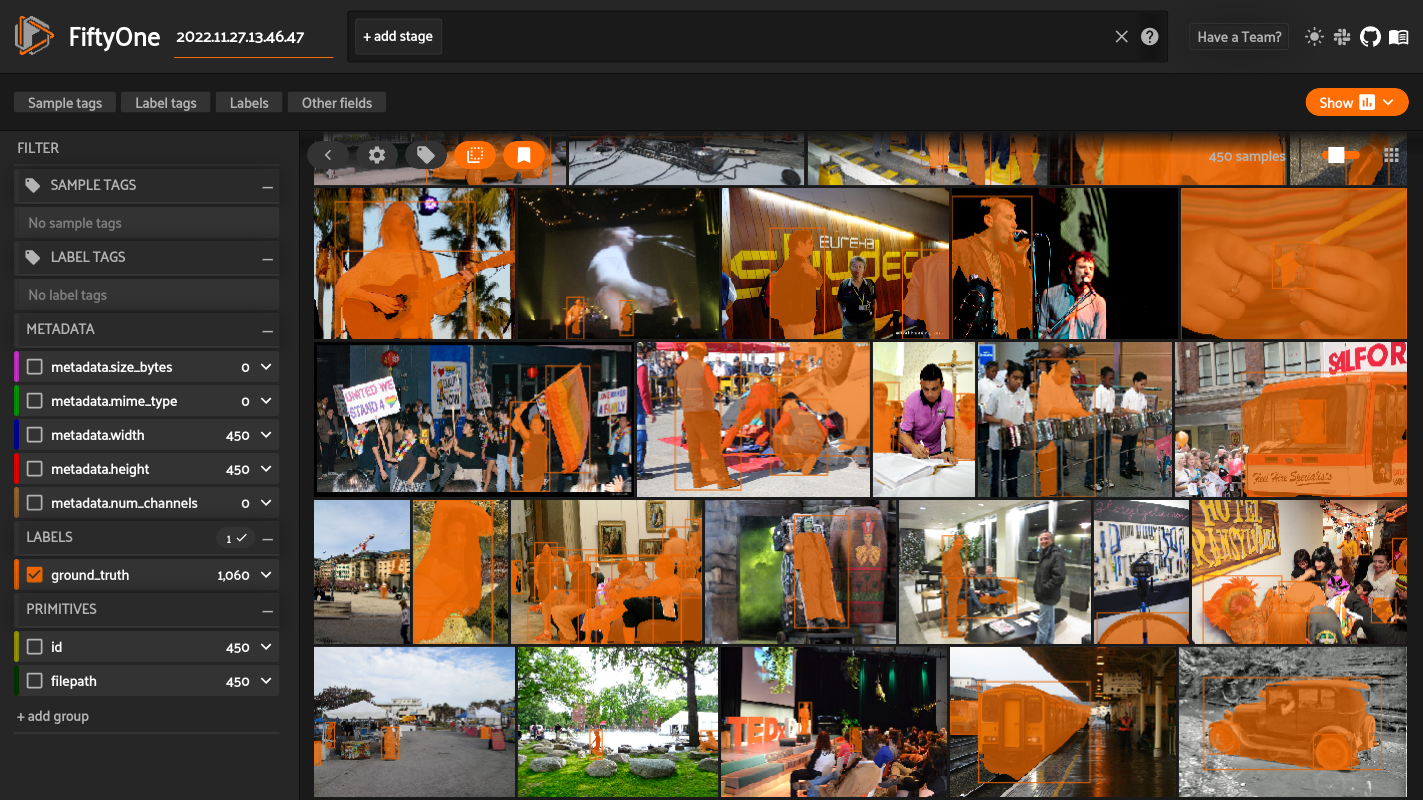

<IPython.core.display.Javascript object>

In [16]:
# Verify that we can load the COCO dataset
dataset2 = fo.Dataset.from_dir(
    dataset_dir="/content/drive/MyDrive/Data/open-images-v6-coco",
    dataset_type=fo.types.COCODetectionDataset,
    label_types="segmentations",  # required in order to load masks (otherwise only bboxes are loaded)
)

session.dataset = dataset2

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [6.0s elapsed, 0s remaining, 374.9Mb/s]       


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [6.0s elapsed, 0s remaining, 374.9Mb/s]       


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Downloading 150 images


 100% |██████████████████| 150/150 [29.2s elapsed, 0s remaining, 4.8 images/s]      


INFO:eta.core.utils: 100% |██████████████████| 150/150 [29.2s elapsed, 0s remaining, 4.8 images/s]      


Writing annotations for 150 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 150 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading 150 images


 100% |██████████████████| 150/150 [28.8s elapsed, 0s remaining, 5.4 images/s]      


INFO:eta.core.utils: 100% |██████████████████| 150/150 [28.8s elapsed, 0s remaining, 5.4 images/s]      


Writing annotations for 150 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 150 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.zoo.datasets:Downloading split 'test' to '/root/fiftyone/coco-2017/test' if necessary


Test split is unlabeled; ignoring classes requirement


INFO:fiftyone.utils.coco:Downloading test info to '/root/fiftyone/coco-2017/tmp-download/image_info_test2017.zip'


 100% |██████|    8.7Mb/8.7Mb [373.1ms elapsed, 0s remaining, 23.4Mb/s]     


INFO:eta.core.utils: 100% |██████|    8.7Mb/8.7Mb [373.1ms elapsed, 0s remaining, 23.4Mb/s]     


Extracting test info to '/root/fiftyone/coco-2017/raw/image_info_test2017.json'


INFO:fiftyone.utils.coco:Extracting test info to '/root/fiftyone/coco-2017/raw/image_info_test2017.json'


INFO:fiftyone.utils.coco:Downloading 150 images


 100% |██████████████████| 150/150 [28.7s elapsed, 0s remaining, 5.4 images/s]      


INFO:eta.core.utils: 100% |██████████████████| 150/150 [28.7s elapsed, 0s remaining, 5.4 images/s]      


Writing annotations for 150 downloaded samples to '/root/fiftyone/coco-2017/test/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 150 downloaded samples to '/root/fiftyone/coco-2017/test/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |█████████████████| 150/150 [2.1s elapsed, 0s remaining, 72.8 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 150/150 [2.1s elapsed, 0s remaining, 72.8 samples/s]      


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |█████████████████| 150/150 [2.1s elapsed, 0s remaining, 71.9 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 150/150 [2.1s elapsed, 0s remaining, 71.9 samples/s]      


Loading 'coco-2017' split 'test'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'test'


Dataset is unlabeled; ignoring classes requirement


 100% |█████████████████| 150/150 [90.9ms elapsed, 0s remaining, 1.6K samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 150/150 [90.9ms elapsed, 0s remaining, 1.6K samples/s]      


Dataset 'coco-2017-150' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-150' created


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


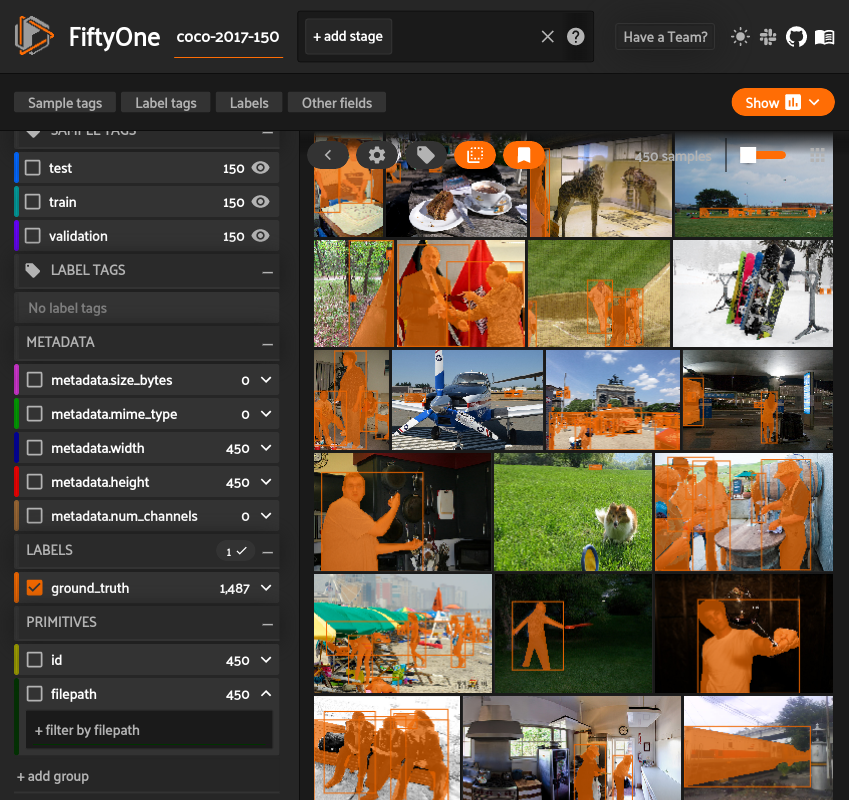

<IPython.core.display.Javascript object>

In [17]:
#Classes can be found here: https://gist.github.com/AruniRC/7b3dadd004da04c80198557db5da4bda
#Create a dataset of 100 samples from the classes selected:
dataset = foz.load_zoo_dataset(
    "coco-2017",
#    split=('train'),
    label_types=["segmentations"],
    classes=["car", "truck", "traffic light", "bench", "motorcycle","bicycle", "train", "stop sign", "bus", "person"],
    only_matching=True,
    max_samples=150,
)
#Launch fiftyone app in the dataset created
session = fo.launch_app(dataset)

In [19]:
# Export in COCO format
dataset.export(
    export_dir="/content/drive/MyDrive/Data/2-coco",
    dataset_type=fo.types.COCODetectionDataset,
    #label_field="segmentations",  # this can be omitted bc dataset only contains one `Detections` field
)


Directory '/content/drive/MyDrive/Data/2-coco' already exists; export will be merged with existing files


 100% |█████████████████| 450/450 [20.5s elapsed, 0s remaining, 100.0 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 450/450 [20.5s elapsed, 0s remaining, 100.0 samples/s]      


In [22]:
!pip install coco-assistant


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 11.2 MB 16.3 MB/s 
     |████████████████████████████████| 3.2 MB 38.7 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [23]:
!git clone https://github.com/ashnair1/COCO-Assistant.git


Cloning into 'COCO-Assistant'...
remote: Enumerating objects: 1559, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 1559 (delta 77), reused 108 (delta 51), pack-reused 1402
Receiving objects: 100% (1559/1559), 12.06 MiB | 18.77 MiB/s, done.
Resolving deltas: 100% (867/867), done.


In [33]:
import os
from coco_assistant import COCO_Assistant

# Specify image and annotation directories
img_dir = "/content/drive/MyDrive/Data/Merge/Image"
ann_dir = "/content/drive/MyDrive/Data/Merge/Labels"


# Create COCO_Assistant object
cas = COCO_Assistant(img_dir, ann_dir)


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [37]:
cas.merge() 

Merging image dirs


100%|██████████| 2/2 [00:12<00:00,  6.26s/it]


Merging annotations


100%|██████████| 2/2 [00:00<00:00, 23.96it/s]
